In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install xgboost


In [2]:
# Load the dataset 
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Display the first few rows of the dataset
print(data.head())


  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


### Data Preprocessing

In [3]:
# Handle Missing Values and Duplicates
# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)

# Check for DUplicates and drop them
data.drop_duplicates(inplace=True)


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [7]:
# Convert 'Order Date' to datetime format, allowing for mixed formats
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', dayfirst=False)

# Check if the conversion was successful
print(data['Order Date'].head())

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]


In [9]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8.0,11.0,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8.0,11.0,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12.0,6.0,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11.0,10.0,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11.0,10.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10,Tamil Nadu,NaN,NaN,NaN
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,12.0,7.0,2015.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,6.0,6.0,2017.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24,Tamil Nadu,NaN,NaN,NaN


In [11]:
# check for outliers
#Z-SCORE

from scipy import stats 
import numpy as np

#calculate z score
z_scores= np.abs(stats.zscore(data['Order Month']))

#set a threshold
threshold=3

outliers= z_scores>threshold

print(data[outliers])

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State, Order Day, Order Month, Order Year]
Index: []


In [13]:
# Fill NaN values in 'Order Month' with the mean of the column
mean_value = data['Order Month'].mean()
data['Order Month'].fillna(mean_value, inplace=True)

# Convert 'Order Month' to integer type
data['Order Month'] = data['Order Month'].astype(int)

# Check the result
print(data[['Order Month']].head())


   Order Month
0           11
1           11
2            6
3           10
4           10


C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\2409168438.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Order Month'].fillna(mean_value, inplace=True)


### Label Encoding for Categorical Variables

In [16]:
# Initialize the label encoder
le = LabelEncoder()

# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Order Month'])

In [18]:
# Check the first few rows to ensure encoding worked
print(data[['Category', 'Sub Category', 'City', 'Region', 'State', 'Order Month']].head())


   Category  Sub Category  City  Region  State  Order Month
0         5            14    21       2      0           11
1         1            13     8       3      0           11
2         3             0    13       4      0            6
3         4            12     4       3      0           10
4         3            18    12       3      0           10


### Exploratory Data Analysis (EDA)

### Distribution of Sales by Category

C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\3464437571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


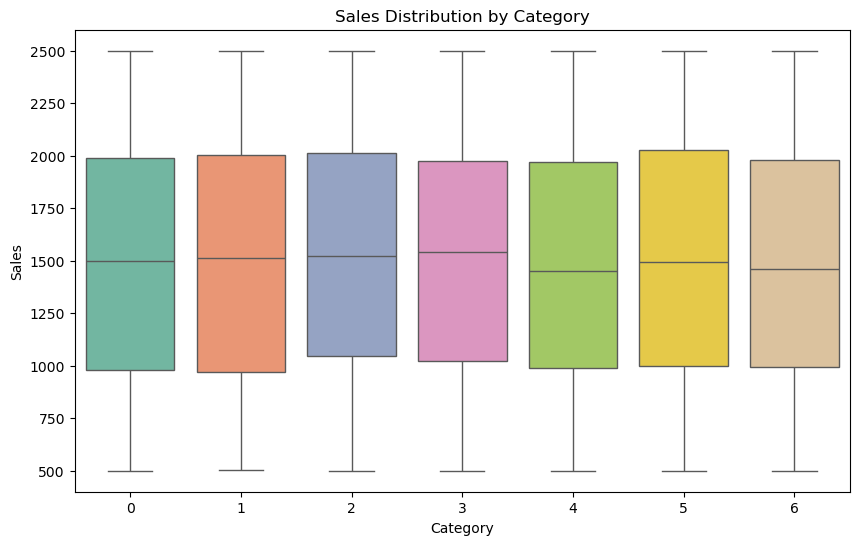

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

### Sales Trends Over Time

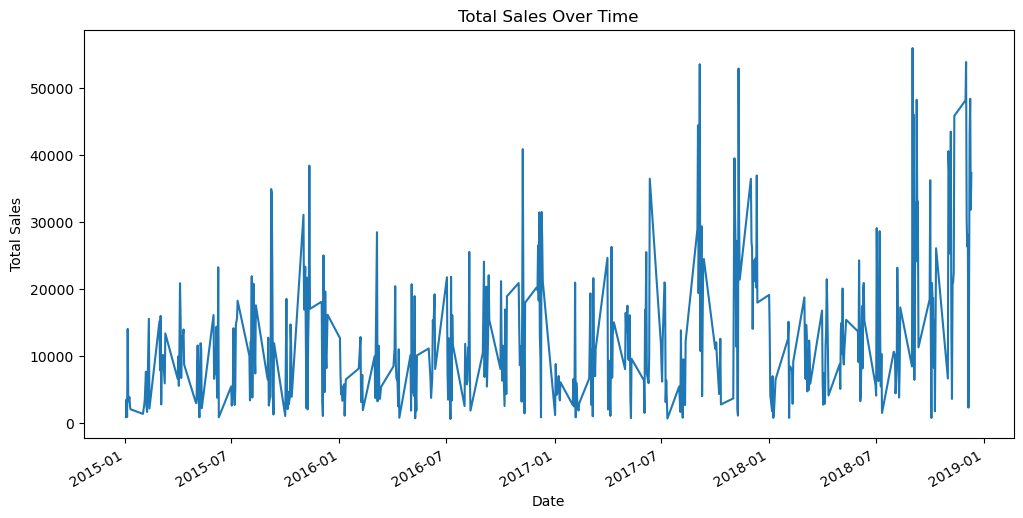

In [25]:
plt.figure(figsize=(12,6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

### Correlation Heatmap

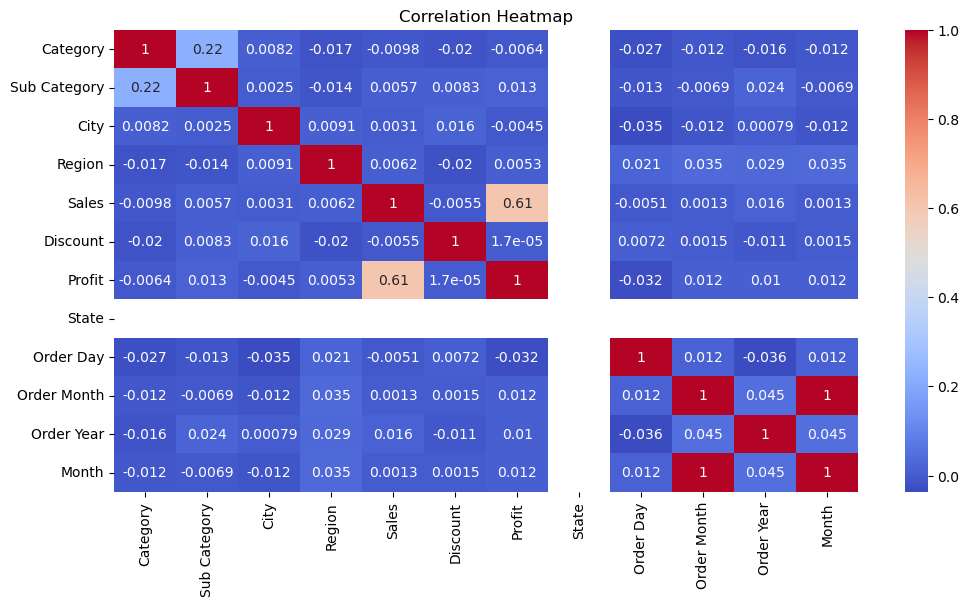

In [28]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation matrix for numeric data
plt.figure(figsize=(12, 6))
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Group By Customer (Summarizing Sales by Customer):

   Customer Name   Sales
19      Krithika  334361
4         Amrish  333351
42         Verma  331665
7         Arutra  325720
44         Vidya  321798


C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\1153275465.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Name', y='Sales', data=customer_sales.head(), palette='viridis')


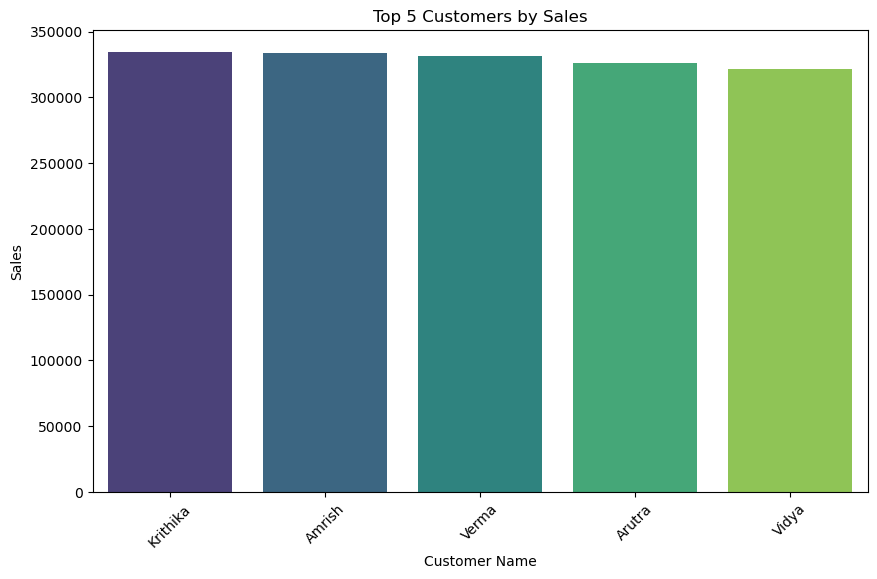

In [31]:
# Group sales by customer and summarize
customer_sales = data.groupby('Customer Name')['Sales'].sum().reset_index()
customer_sales = customer_sales.sort_values(by='Sales', ascending=False)

# Display top 5 customers by sales
print(customer_sales.head())

# Optional: Visualize the top 5 customers by sales
plt.figure(figsize=(10,6))
sns.barplot(x='Customer Name', y='Sales', data=customer_sales.head(), palette='viridis')
plt.title('Top 5 Customers by Sales')
plt.xticks(rotation=45)
plt.show()


### Group By Region (Summarizing Sales by Region):

   Region    Sales
4       4  4798743
1       1  4248368
0       0  3468156
3       3  2440461
2       2     1254


C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\1794410998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, palette='coolwarm')


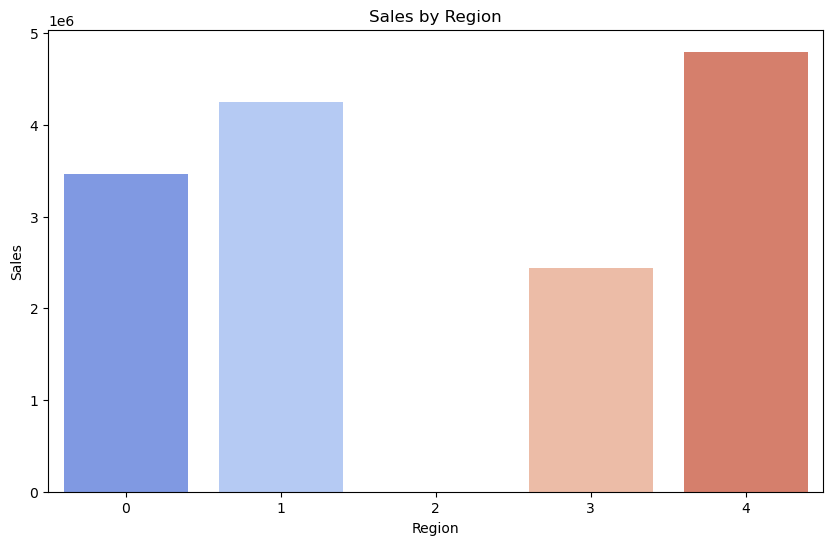

In [34]:
# Group sales by region and summarize
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
region_sales = region_sales.sort_values(by='Sales', ascending=False)

# Display sales by region
print(region_sales)

# Optional: Visualize sales by region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='coolwarm')
plt.title('Sales by Region')
plt.show()


### Feature Selection and Model Building

In [37]:
# Feature Engineering: Interaction Feature (Discount * Profit)
data['Discount_Profit_Interaction'] = data['Discount'] * data['Profit']

# Feature Engineering: Time-based Features (Day of the Week and Weekend)
data['Order_DayOfWeek'] = data['Order Date'].dt.dayofweek
data['is_weekend'] = data['Order_DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Feature Engineering: Aggregated Feature (Average Sales by Customer)
data['Customer_Avg_Sales'] = data.groupby('Customer Name')['Sales'].transform('mean')

# Check the newly created features
print(data[['Discount_Profit_Interaction', 'Order_DayOfWeek', 'is_weekend', 'Customer_Avg_Sales']].head())


   Discount_Profit_Interaction  Order_DayOfWeek  is_weekend  \
0                      48.1536              2.0           0   
1                      26.9640              2.0           0   
2                      34.6920              0.0           0   
3                      22.4000              1.0           0   
4                     238.7970              1.0           0   

   Customer_Avg_Sales  
0         1412.687500  
1         1447.052910  
2         1477.581731  
3         1493.368132  
4         1517.838235  


In [65]:
# Feature Engineering code here...

# Fill NaN values in 'Order Day', 'Order Year', and 'Order_DayOfWeek'
data['Order Day'].fillna(0, inplace=True)
data['Order Year'].fillna(0, inplace=True)
data['Order_DayOfWeek'].fillna(0, inplace=True)

# Convert to integer types
data['Order Day'] = data['Order Day'].astype(int)
data['Order Year'] = data['Order Year'].astype(int)
data['Order_DayOfWeek'] = data['Order_DayOfWeek'].astype(int)


Order ID                               object
Customer Name                          object
Category                                int32
Sub Category                            int32
City                                    int32
Order Date                     datetime64[ns]
Region                                  int32
Sales                                   int64
Discount                              float64
Profit                                float64
State                                   int32
Order Day                               int32
Order Month                             int32
Order Year                              int32
Month                                   int64
Discount_Profit_Interaction           float64
Order_DayOfWeek                         int32
is_weekend                              int64
Customer_Avg_Sales                    float64
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\2388043482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Order Year'].fillna(0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19696\2388043482.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [67]:
# Check data types
print(data.dtypes)


Order ID                               object
Customer Name                          object
Category                                int32
Sub Category                            int32
City                                    int32
Order Date                     datetime64[ns]
Region                                  int32
Sales                                   int64
Discount                              float64
Profit                                float64
State                                   int32
Order Day                               int32
Order Month                             int32
Order Year                              int32
Month                                   int64
Discount_Profit_Interaction           float64
Order_DayOfWeek                         int32
is_weekend                              int64
Customer_Avg_Sales                    float64
dtype: object


In [39]:
# Update the feature selection to include new engineered features
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Month'])

# Target remains the same
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


###  Split Data and Impute Missing Values


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select features and target
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Month'])
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, you can scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [43]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###  Train a Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 212120.03065527134
R-squared: 0.3568546083003107


### Random Forest:

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest Mean Squared Error: 221547.24354502253
Random Forest R-squared: 0.32827141175877883


### XGBoost:

In [51]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'XGBoost Mean Squared Error: {xgb_mse}')
print(f'XGBoost R-squared: {xgb_r2}')


XGBoost Mean Squared Error: 244564.65941101577
XGBoost R-squared: 0.2584828826070602


## Conclusion

- I explored and evaluated three models: **Linear Regression**, **Random Forest**, and **XGBoost**.
- **Linear Regression** performed the best with the lowest Mean Squared Error (MSE: 212,120.03) and the highest R-squared value (R^2: 0.3569).
- **Random Forest** and **XGBoost** did not perform as well, with higher MSE and lower R^2 values.
- Based on the results, I conclude that **Linear Regression** is the most suitable model for this dataset.


